# Import and installations

In [1]:
import numpy as np
from photonic_func import Photonic 
# pip install jupyterlab==1.2.0
# jupyter labextension install @jupyterlab/plotly-extension
# jupyter labextension install @jupyterlab/toc  
# Plotly version 4.0.0 (pip install plotly==4.0.0)
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)  

# Call photonic class using default config

In [2]:
photonic = Photonic()

In [3]:
dist_vec=np.array([1, 2, 50])
print('------\nDist vector  '+' '.join('{}: {:6.1f} '.format(*k) for k in enumerate(dist_vec)), 'm')
print('wallFlux     '+' '.join('{}: {:6.3f} '.format(*k) for k in enumerate(photonic.wallFlux(dist_vec=dist_vec))), 'W/m**2')
print('siliconFlux  '+' '.join('{}: {:6.4f} '.format(*k) for k in enumerate(photonic.siliconFlux2(dist_vec=dist_vec))), 'W/m**2')
print('Photoelecron '+' '.join('{}: {:6.1f} '.format(*k) for k in enumerate(photonic.photoelectron2(dist_vec=dist_vec))), 'e-')

------
Dist vector  0:    1.0  1:    2.0  2:   50.0  m
wallFlux     0: 17.326  1:  4.331  2:  0.007  W/m**2
siliconFlux  0: 0.4873  1: 0.1218  2: 0.0002  W/m**2
Photoelecron 0: 1063.3  1:  265.8  2:    0.4  e-


# Call other config

In [4]:
photonic = Photonic(config='Cfg2')

In [5]:
dist_vec=np.array([1, 2, 5, 50])
print('------\nDist vector  '+' '.join('{}: {:7.1f} '.format(*k) for k in enumerate(dist_vec)), 'm')
print('wallFlux     '+' '.join('{}: {:7.3f} '.format(*k) for k in enumerate(photonic.wallFlux(dist_vec=dist_vec))), 'W/m**2')
print('siliconFlux  '+' '.join('{}: {:7.4f} '.format(*k) for k in enumerate(photonic.siliconFlux2(dist_vec=dist_vec))), 'W/m**2')
print('Photoelecron '+' '.join('{}: {:7.1f} '.format(*k) for k in enumerate(photonic.photoelectron2(dist_vec=dist_vec))), 'e-')

------
Dist vector  0:     1.0  1:     2.0  2:     5.0  3:    50.0  m
wallFlux     0:   8.663  1:   2.166  2:   0.347  3:   0.003  W/m**2
siliconFlux  0:  0.1692  1:  0.0423  2:  0.0068  3:  0.0001  W/m**2
Photoelecron 0: 66158.7  1: 16539.7  2:  2646.3  3:    26.5  e-


# Plots vs. distance

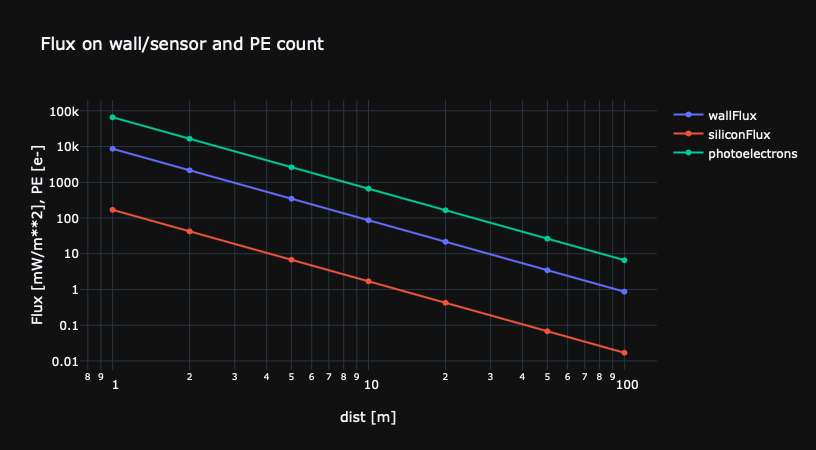

In [10]:
dist_vec = np.array([1,2,5,10,20,50,100])
trace0 = go.Scatter(x=dist_vec,
                    y=1000 * photonic.wallFlux(dist_vec=dist_vec), mode='lines+markers',  # Select 'lines', 'markers' or 'lines+markers'
                    name='wallFlux')
trace1 = go.Scatter(x=dist_vec,
                    y=1000 * photonic.siliconFlux2(dist_vec=dist_vec), mode='lines+markers',
                    name='siliconFlux')
trace2 = go.Scatter(x=dist_vec,
                    y=photonic.photoelectron2(dist_vec=dist_vec), mode='lines+markers',
                    name='photoelectrons')

data = [trace0, trace1, trace2]

layout = {'title': 'Flux on wall/sensor and PE count',
          'xaxis': {'title': 'dist [m]',
                    'type': 'log'},  # Select 'log' or 'linear'
          'yaxis': {'title': 'Flux [mW/m**2], PE [e-]',
                    'type': 'log'},  # Select 'log' or 'linear'
          'template': 'plotly_dark'}

iplot({'data': data, 'layout': layout})